<a href="https://colab.research.google.com/github/netmatze/mlmatze/blob/main/calculating_p_value_and_t_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### in this notebook i will calculate the p-value for students that are attending an university and the i will use the t-test to calculate if the measure is working.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli

p = 0.28
bernoulli_pmf = bernoulli(p)

print(bernoulli_pmf)

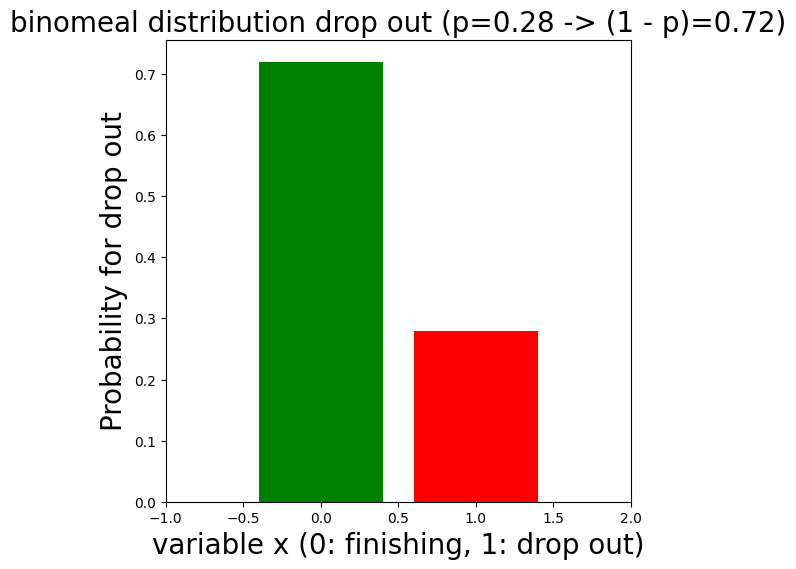

In [ ]:
x=[0,1]

# For the visualization of the bar plot of Bernoulli's distribution
plt.figure(figsize=(6,6))
plt.xlim(-1, 2)
plt.bar(x, bernoulli_pmf.pmf(x), color=['green', 'red', 'green', 'blue', 'cyan'])

# For labelling of Bar plot
plt.title('binomeal distribution drop out (p=0.28 -> (1 - p)=0.72)', fontsize='20')
plt.xlabel('variable x (0: finishing, 1: drop out)', fontsize='20')
plt.ylabel('Probability for drop out', fontsize='20')

plt.show()

In [ ]:
plt.plot(x, binomial_pmf, color='blue')
plt.title(f"Binomial Distribution (n={n}, p={p})")
plt.show()

### calculating the z-score for normal distributed data

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

[129. 118. 134.  88. 130. 107. 109. 110. 136. 110.  98. 129.  92. 115.
 108. 111. 115. 100. 110. 126. 135. 115. 126.  70.  93.  86. 120.  90.
 122. 122.]
mean: 112.0 - std: 16.0


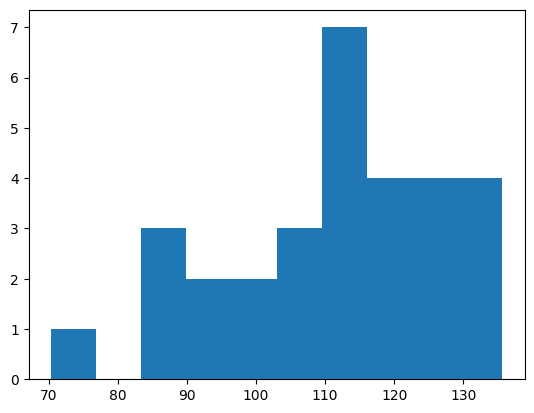

In [ ]:
array = np.random.normal(112, 15, 30)
print(np.rint(array))
print(f"mean: {array.mean().round()} - std: {array.std().round()}")
n, bins, patches = plt.hist(array)
plt.show()

In [ ]:
[129. 118. 134.  88. 130. 107. 109. 110. 136. 110.  98. 129.  92. 115.
 108. 111. 115. 100. 110. 126. 135. 115. 126.  70.  93.  86. 120.  90.
 122. 122.]
mean: 112.0 - std: 16.0

In [ ]:
mu, sigma = 100, 5
array = np.random.normal(mu, sigma, 50)
array

array([103.54004967, 100.34708666, 108.31168329, 102.39990204,
       104.36542242,  97.60331448, 100.95978767,  93.15143861,
        92.22132434, 108.74526165, 104.08023937, 105.88725975,
       101.05277479,  96.65091846, 104.22327945,  96.34968375,
        91.82433369,  96.51756175, 104.12186057, 103.6237912 ,
       110.62750532, 104.12383919,  95.31491381,  96.72540593,
        94.24517759, 108.24103349,  96.26171362, 106.16712066,
        99.65123957, 102.20831171,  99.20113695, 100.51813638,
       101.78393355,  92.57475776, 101.63444135,  97.46031878,
        97.61721323, 107.37769545,  98.97851249, 109.97613448,
        96.24679046,  99.25151657, 100.98045741, 100.27528948,
       111.64596541, 103.1079749 , 105.33958718,  97.58612616,
       102.29861617,  98.78939416])

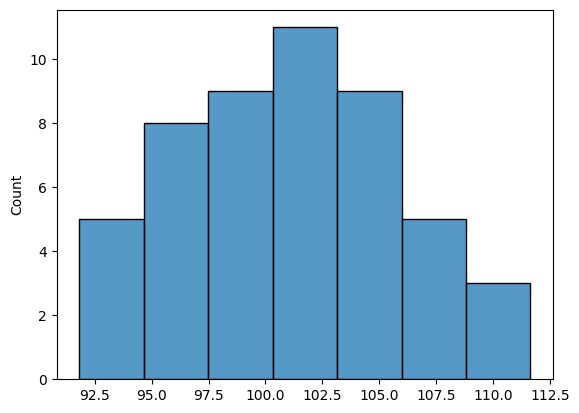

In [ ]:
sns.histplot(array)
plt.show()

### create two outliers

In [ ]:
array[1] = -180
array[49] = 250

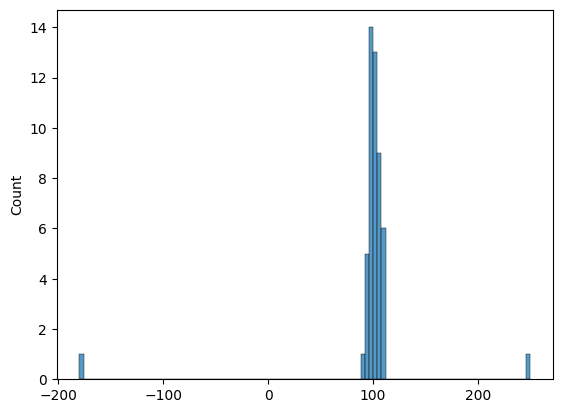

In [ ]:
sns.histplot(array)
plt.show()

In [ ]:
df = pd.DataFrame(array, columns=["Data"])
df.head()

,Data
0,96.691349
1,-180.000000
2,99.926381
3,104.610336
4,98.229277


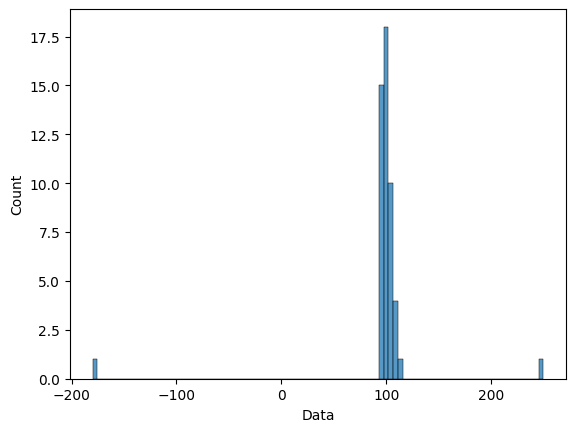

In [ ]:
sns.histplot(df["Data"])
plt.show()

### z-score = (x - x_mean) / standard_deviation

$\hat{z} = (x - \hat{x}) / \hat{s} $

In [ ]:
def calculate_outlier(df, column, max_zscore = 3):
  col_zscore = 'zscore'
  df[col_zscore] = (df[column] - df[column].mean()) / df[column].std(ddof=0)
  df['outlier'] = (abs(df[col_zscore]) >= max_zscore).astype(int)
  return df

In [ ]:
df = pd.DataFrame(array, columns=["Data"])
df_outlier = pd.DataFrame(calculate_outlier(df, 'Data', 3))
df_outlier.loc[df_outlier['outlier'] == 1]

,Data,zscore,outlier
1,-180.0,-6.164866,1
49,250.0,3.364297,1


### Z-test
$\hat{Z} = (x - \hat{x}) / \hat{s} $ / sqrt(n)

In [ ]:
col_zscore = "zscore"
df = pd.DataFrame(array, columns=["Data"])
df[col_zscore] = (df["Data"] - df["Data"].mean()) / df["Data"].std(ddof=0)
df.head()

,Data,zscore
0,103.540050,0.112434
1,-180.000000,-6.164242
2,108.311683,0.218062
3,102.399902,0.087194
4,104.365422,0.130705


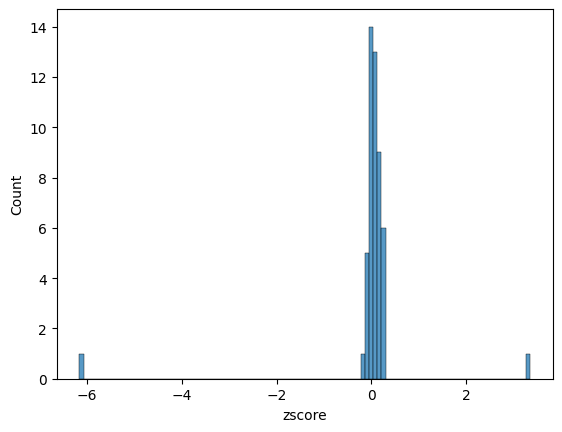

In [ ]:
sns.histplot(df["zscore"])
plt.show()

In [ ]:
df["outlier"] = (abs(df["zscore"]) >= 3).astype(int)
df.loc[df.outlier == 1]

,Data,zscore,outlier
1,-180.0,-6.164242,1
49,250.0,3.354591,1


In [ ]:
df.head()

,Data,Data_zscore,outlier,Data_outlier
0,96.509670,-0.004157,0,0
1,-180.000000,-6.150311,1,1
2,95.097113,-0.035555,0,0
3,97.742807,0.023253,0,0
4,110.926237,0.316289,0,0


In [ ]:
df.loc[df.outlier == 1]

,Data,Data_zscore,outlier,Data_outlier
1,-180.0,-6.150311,1,1


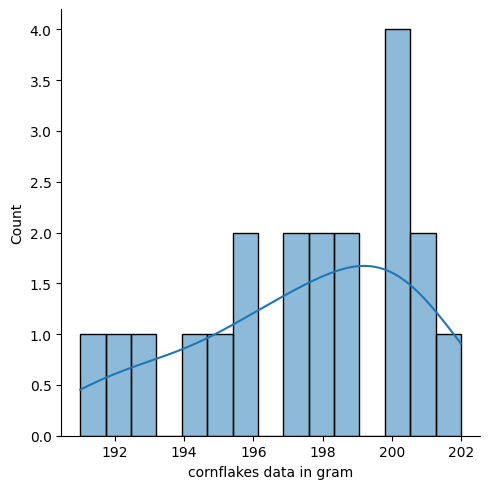

In [ ]:
import pandas as pd
import seaborn as sns

x = [197,191,201,200,200,195,196,199,202,197,192,196,199,201,200,200,194,198,193,198]
df = pd.DataFrame(x, columns=['cornflakes data in gram'])
# df.hist()

#create histogram with density curve overlaid
sns.displot(df['cornflakes data in gram'], kde=True, bins=15)

### calculating confidence interval

https://www.machinelearningplus.com/statistics/confidence-interval/

### Confidence Interval Formula
The formula and method of estimating confidence interval depends on whether the population’s standard deviation is known on not.

If population standard deviation is known, then:

${ci} = \hat{X} +|- \hat{Z} * {sigma} / sqrt(n) $

If population standard deviation is not known, then:

${ci} = \hat{X} +|- \hat{T} * {s} / sqrt(n) $

In [ ]:
import numpy as np
array =  np.array([160, 165, 170, 175, 180, 182, 183, 185, 186, 190])
array.mean()
array.std()

9.308061022576076